In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from tensorflow.keras.models import load_model

model = load_model("/content/drive/MyDrive/Colab Notebooks/Saved_Models/Model_2_draft-1.keras")
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 10 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 64, 64,    │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 64, 64,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 64, 64,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 64, 64,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 64, 64,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 64, 64,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 64, 64,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 64, 64,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 64, 64,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 65, 65,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 32, 32,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 32, 32,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 32, 32,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 32, 32,    │      2,304 │ block_1_depthwis

 Total params: 10,123,851 (38.62 MB)

 Trainable params: 2,621,955 (10.00 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 5,243,912 (20.00 MB)

In [3]:
from tensorflow.keras.preprocessing import image
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Define class labels (make sure order matches training)
classes = [
    "AH",
    "PMI",
    "MI"

]

def test_image_with_bargraph(img_path, use_mobilenet=False):
    # Load and preprocess image
    img = image.load_img(img_path, target_size=(128, 128))  # Changed target_size to 128x128
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)

    if use_mobilenet:
        # Preprocess for MobileNetV2 if that's the base model
        img_array = tf.keras.applications.mobilenet_v2.preprocess_input(img_array)
    else:
        img_array = img_array / 255.0  # Normalization for custom CNN

    # Predict with the already loaded model
    pred = model.predict(img_array)[0]  # prediction vector

    # Find predicted class
    class_idx = np.argmax(pred)
    prediction = classes[class_idx]
    confidence = np.max(pred) * 100

    # Plot bar graph with percentages
    plt.figure(figsize=(6,5))
    bars = plt.bar(classes, pred*100, color=["red","orange","blue"])
    plt.ylabel("Confidence (%)")
    plt.title("Prediction Probabilities")

    # Add percentage text on each bar
    for bar, value in zip(bars, pred*100):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                 f"{value:.2f}%", ha="center", va="bottom", fontsize=10, fontweight="bold")

    plt.show()

    return prediction, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


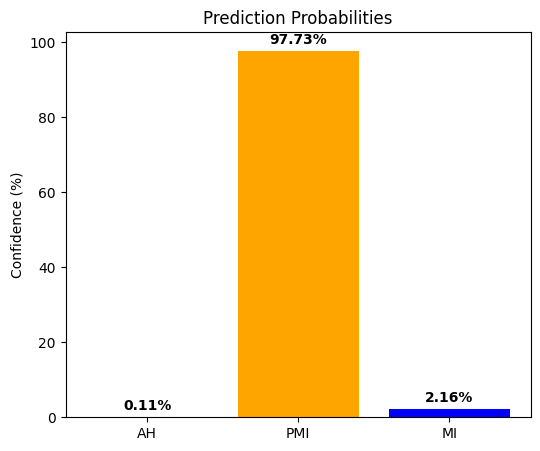

Final Prediction of the Image is : PMI With Confidence of  (97.73%)


In [7]:
image_path_for_test = "/content/PMI(8).jpg"

prediction, conf = test_image_with_bargraph(image_path_for_test, use_mobilenet=False)
print("Final Prediction of the Image is :", prediction, "With Confidence of ", f"({conf:.2f}%)")